<a href="https://colab.research.google.com/github/Tilak-Shenoy/IE517/blob/main/IE517_S23_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp

In [1]:
# Upload file from the system. We are using High Yield Corporate Bond dataset in this case
from google.colab import files
data_to_load = files.upload()

Saving HY_Universe_corporate bond.csv to HY_Universe_corporate bond.csv


In [42]:
#Save the data into a dataframe
df = pd.read_csv('HY_Universe_corporate bond.csv')
df.head()

CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_mean_volume  \
0         0.292359         5                 0.521595        3105926.765   
1         0.974071         2                 0.337071        1721696.774   
2         0.594470         5                 0.467742        4200313.433   
3         0.892462         3                 0.212864        6321559.783   
4         0.690722         5                 0.500000        5936714.286   

   weekly_median_volume weekly_max_volume weekly_min_volume  \
0             2000000.0        18980000.0           60000.0   
1             1160000.0        11197000.0            5000.0   
2             3520000.0        14000000.0           24000.0   
3             5487500.0        18459000.0           30000.0   
4             3305500.0        72760000.0           90000.0   

  weekly_mean_ntrades weekly_median_ntrades  
0            3.541176                     1  
1           18.412903                     3  
2            6.477612                     1  
3           27.038043                     1  
4            9.238095                     1  

[5 rows x 37 columns]

In [89]:
#Describe data
df.describe(percentiles = [.01, .10, .25, 0.50, .75, .975, .99])

Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
1%        0.000000   3.750000e+08                 24.330000        4.653379   
10%       2.950000   4.000000e+08                 59.830000        9.769497   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
97.5%    11.750000   2.250000e+09                365.430000       38.028023   
99%      12.976000   3.063766e+09                575.704000       41.951166   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min       0.043888      1.000000   7.000000e+03       4.000000e+03   
1%        0.046534      1.000000   4.000000e+05       1.000000e+04   
10%       0.097695     17.000000   1.000000e+07       2.500000e+04   
25%       0.127386    116.000000   6.189000e+07       7.500000e+04   
50%       0.165385    674.000000   3.480000e+08       5.000000e+05   
75%       0.221201   2467.000000   9.328420e+08       1.000000e+06   
97.5%     0.380280  20612.000000   3.656625e+09       1.000000e+06   
99%       0.419512  30666.000000   5.021896e+09       1.000000e+06   
max       0.546739  57935.000000   8.979960e+09       3.400000e+06   

       total_mean_size  n_days_trade  ...  percent_intra_dealer  \
count     2.721000e+03   2721.000000  ...           2721.000000   
mean      5.255853e+05    316.581771  ...              0.244306   
std       2.670677e+05    347.802629  ...              0.152165   
min       5.000000e+03      1.000000  ...              0.000000   
1%        3.481554e+04      1.000000  ...              0.000000   
10%       1.464936e+05      8.000000  ...              0.018868   
25%       3.010473e+05     45.000000  ...              0.124731   
50%       5.769231e+05    184.000000  ...              0.250000   
75%       7.289650e+05    483.000000  ...              0.356808   
97.5%     1.000000e+06   1256.000000  ...              0.520583   
99%       1.000000e+06   1427.200000  ...              0.553807   
max       3.400000e+06   1667.000000  ...              1.000000   

       percent_uncapped    bond_type  Client_Trade_Percentage  \
count       2721.000000  2721.000000              2721.000000   
mean           0.676536     3.496141                 0.379648   
std            0.219661     1.712004                 0.144545   
min            0.000000     1.000000                 0.000000   
1%             0.000000     1.000000                 0.000000   
10%            0.406667     1.000000                 0.216903   
25%            0.534224     1.000000                 0.290826   
50%            0.681992     5.000000                 0.376385   
75%            0.859256     5.000000                 0.448718   
97.5%          1.000000     5.000000                 0.676471   
99%            1.000000     5.000000                 1.000000   
max            1.000000     5.000000                 1.000000   

       weekly_mean_volume  weekly_median_volume  weekly_max_volume  \
count        2.721000e+03          2.721000e+03       2.721000e+03   
mean         7.588325e+06          5.672609e+06       4.915523e+07   
std          8.979311e+06          7.340321e+06       6.703860e+07   
min          7.000000e+03          7.000000e+03       7.000000e+03   
1%   

In [6]:
# Pull the number of rows and columns in the data
df.shape

(2721, 37)

In [7]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  2721
Number of columns:  37


In [9]:
# Print all column names
df.columns.values

array(['CUSIP', 'Ticker', 'Issue Date', 'Maturity', '1st Call Date',
       'Moodys', 'S_and_P', 'Fitch', 'Bloomberg Composite Rating',
       'Coupon', 'Issued Amount', 'Maturity Type', 'Coupon Type',
       'Maturity At Issue months', 'Industry', 'LiquidityScore',
       'Months in JNK', 'Months in HYG', 'Months in Both', 'IN_ETF',
       'LIQ SCORE', 'n_trades', 'volume_trades', 'total_median_size',
       'total_mean_size', 'n_days_trade', 'days_diff_max',
       'percent_intra_dealer', 'percent_uncapped', 'bond_type',
       'Client_Trade_Percentage', 'weekly_mean_volume',
       'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume',
       'weekly_mean_ntrades', 'weekly_median_ntrades'], dtype=object)

In [14]:
# Describe each column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CUSIP                       2721 non-null   object 
 1   Ticker                      2721 non-null   object 
 2   Issue Date                  2721 non-null   object 
 3   Maturity                    2721 non-null   object 
 4   1st Call Date               2721 non-null   object 
 5   Moodys                      2721 non-null   object 
 6   S_and_P                     2721 non-null   object 
 7   Fitch                       2721 non-null   object 
 8   Bloomberg Composite Rating  2721 non-null   object 
 9   Coupon                      2721 non-null   float64
 10  Issued Amount               2721 non-null   float64
 11  Maturity Type               2721 non-null   object 
 12  Coupon Type                 2721 non-null   object 
 13  Maturity At Issue months    2721 

In [50]:
# Find missing values
''' df.isna() is not working for some reason
'''
for col in df.columns.values:
  print(col, df[col].eq('Nan').sum())

CUSIP 0
Ticker 0
Issue Date 0
Maturity 0
1st Call Date 1757
Moodys 161
S_and_P 186
Fitch 1170
Bloomberg Composite Rating 41
Coupon 0
Issued Amount 0
Maturity Type 0
Coupon Type 0
Maturity At Issue months 0
Industry 0
LiquidityScore 0
Months in JNK 1408
Months in HYG 1408
Months in Both 1408
IN_ETF 0
LIQ SCORE 0
n_trades 0
volume_trades 0
total_median_size 0
total_mean_size 0
n_days_trade 0
days_diff_max 0
percent_intra_dealer 0
percent_uncapped 0
bond_type 0
Client_Trade_Percentage 0
weekly_mean_volume 0
weekly_median_volume 0
weekly_max_volume 0
weekly_min_volume 0
weekly_mean_ntrades 0
weekly_median_ntrades 0


Q-Q Plot of Coupon


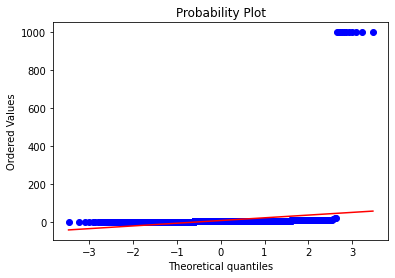

Q-Q Plot of Issued Amount


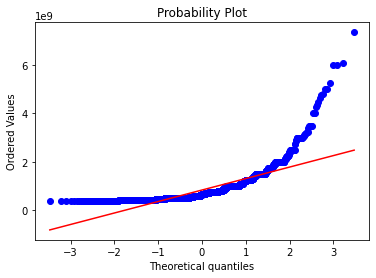

Q-Q Plot of Maturity At Issue months


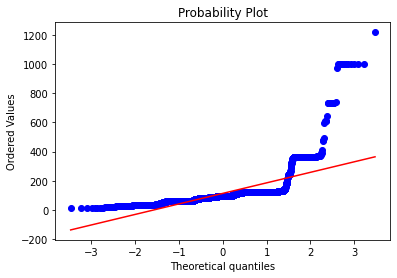

Q-Q Plot of LiquidityScore


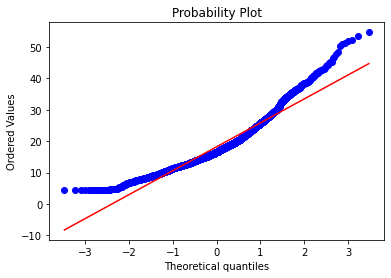

Q-Q Plot of LIQ SCORE


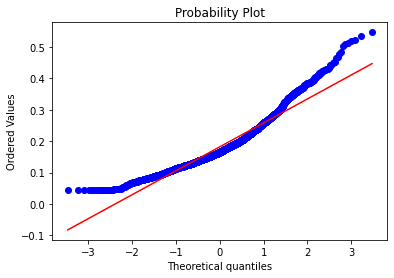

Q-Q Plot of n_trades


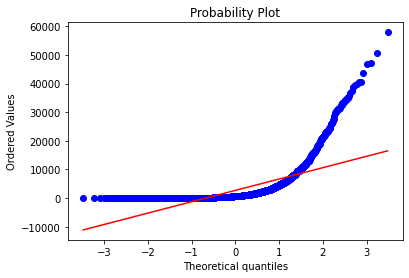

Q-Q Plot of volume_trades


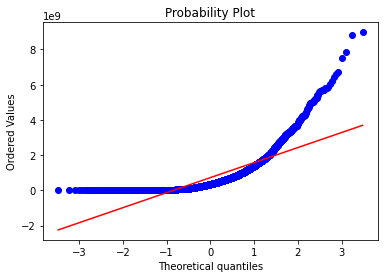

Q-Q Plot of total_median_size


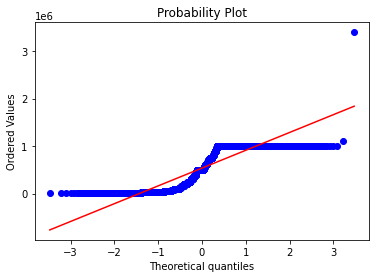

Q-Q Plot of total_mean_size


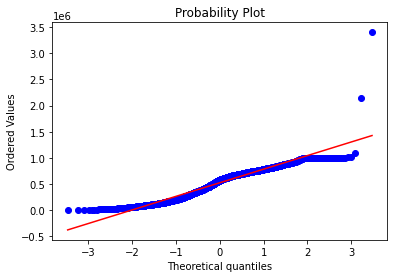

Q-Q Plot of n_days_trade


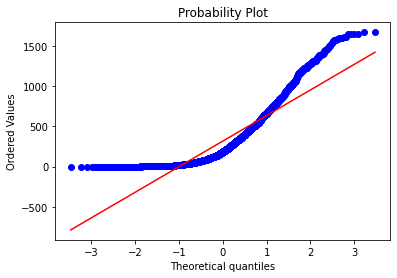

Q-Q Plot of days_diff_max


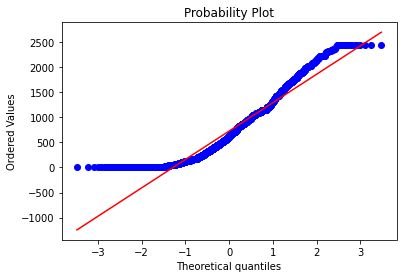

Q-Q Plot of percent_intra_dealer


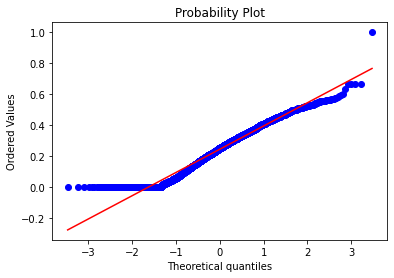

Q-Q Plot of percent_uncapped


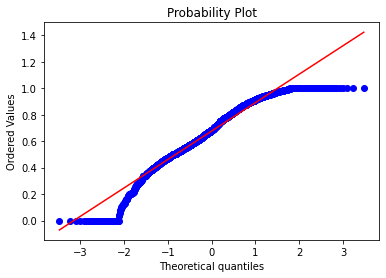

Q-Q Plot of bond_type


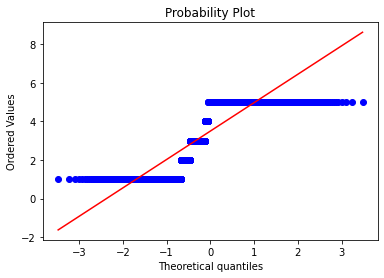

Q-Q Plot of Client_Trade_Percentage


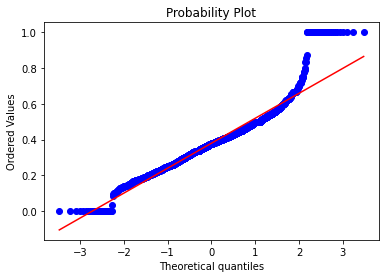

Q-Q Plot of weekly_mean_volume


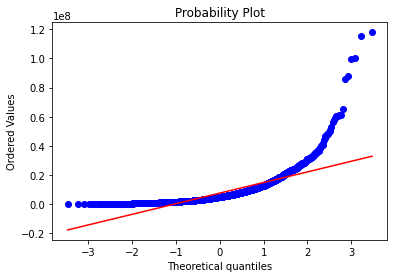

Q-Q Plot of weekly_median_volume


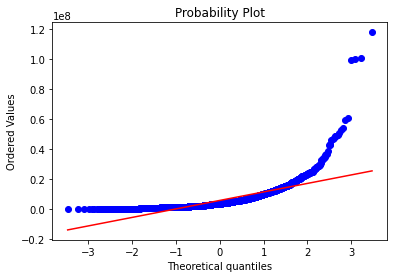

Q-Q Plot of weekly_max_volume


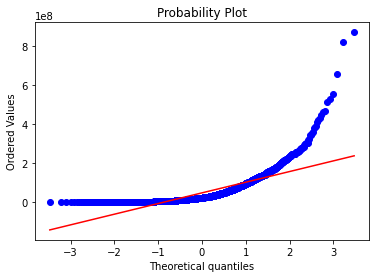

Q-Q Plot of weekly_min_volume


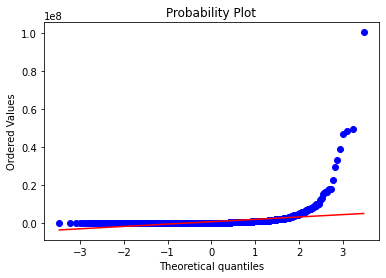

Q-Q Plot of weekly_mean_ntrades


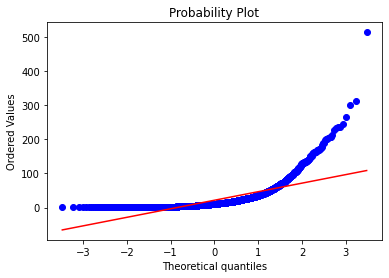

Q-Q Plot of weekly_median_ntrades


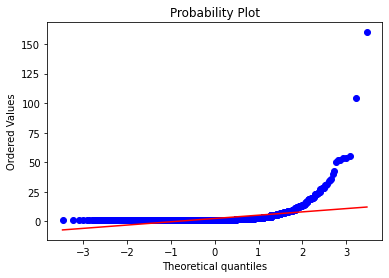

In [78]:
# Build Q-Q Plot of all the columns whose data type is not string
col_continuous = []
for col in df.columns.values:
  if(type(df[col][0]) != str):
    col_continuous.append(col)
    print('Q-Q Plot of', col)
    stats.probplot(df[col], dist="norm", plot=pylab)
    pylab.show()

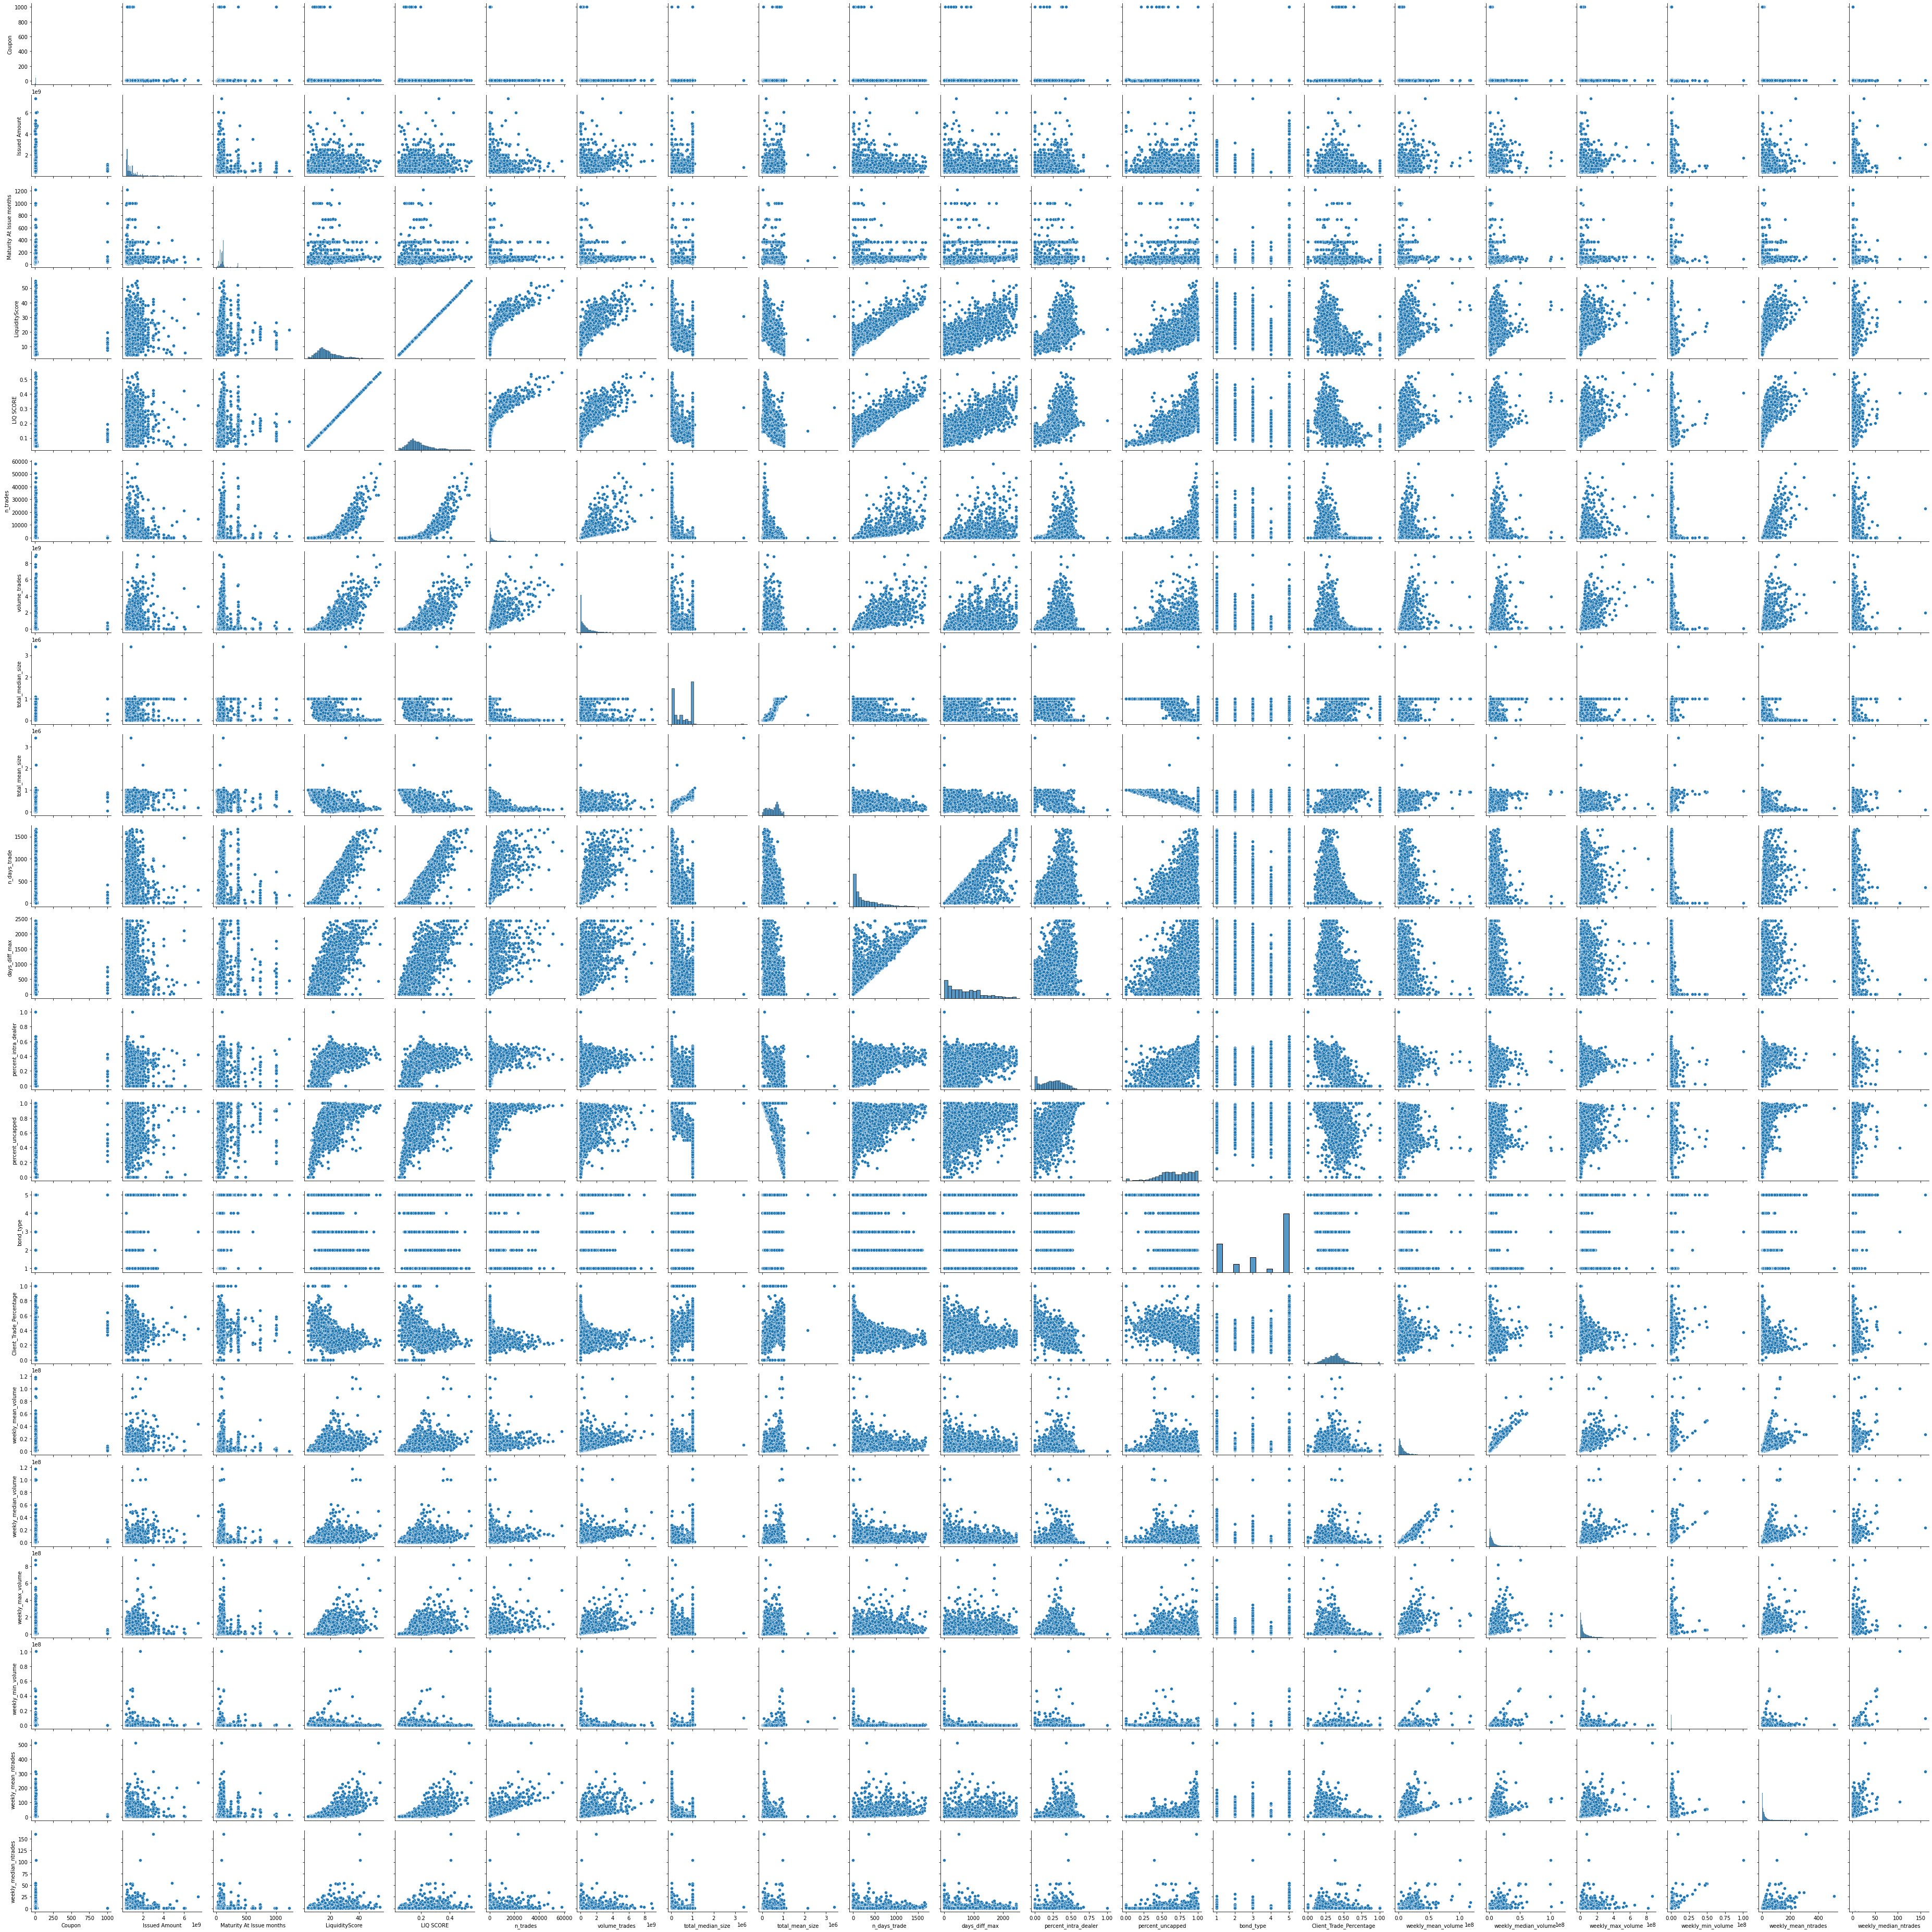

In [68]:
# Building pair plot
sns.pairplot(df)

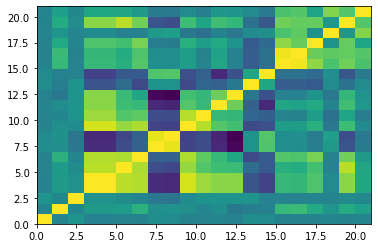

In [82]:
# Building a correlation heatmap
corMat = df.corr()
plt.pcolor(corMat)
plt.show()

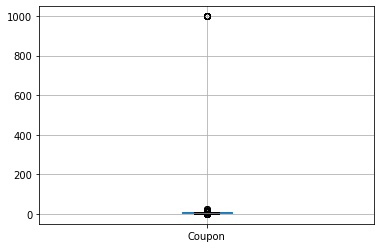

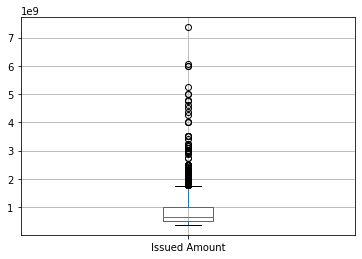

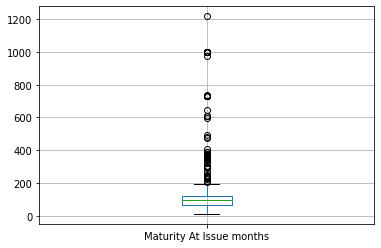

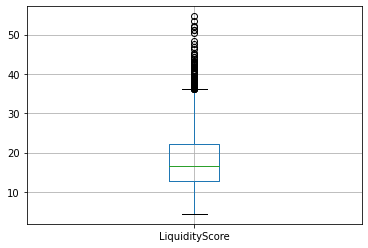

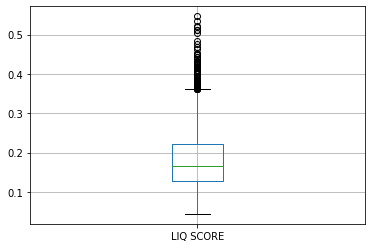

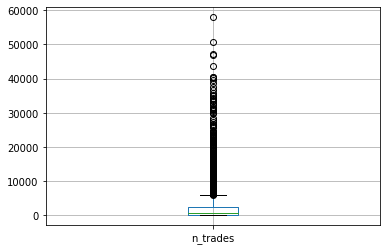

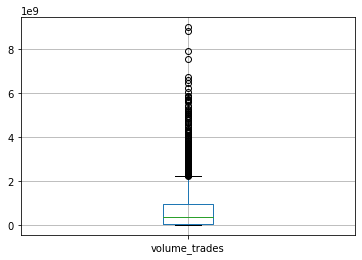

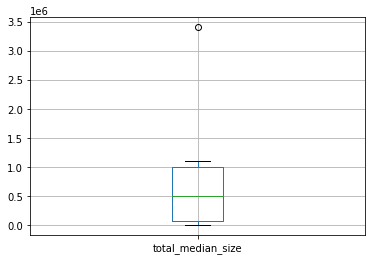

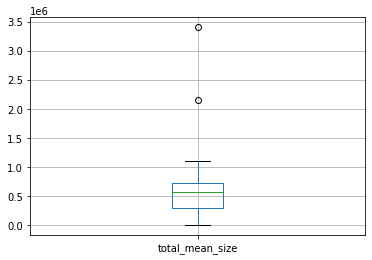

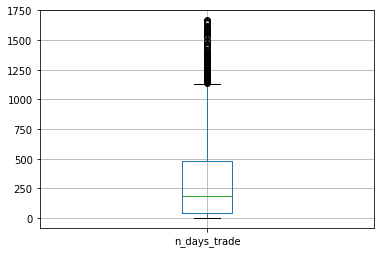

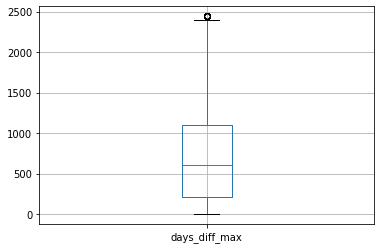

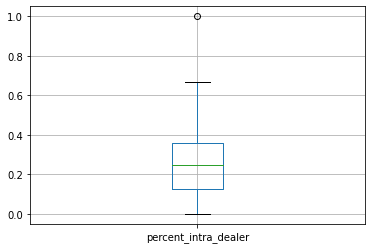

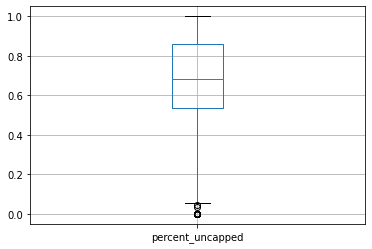

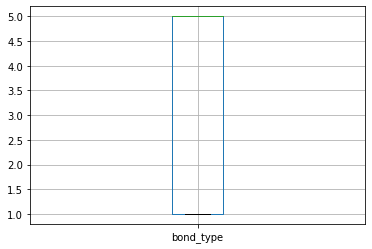

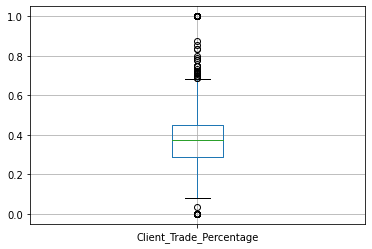

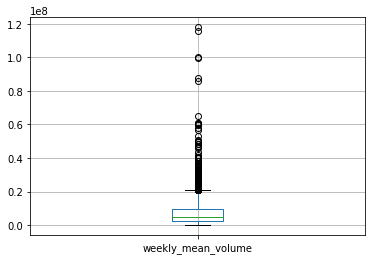

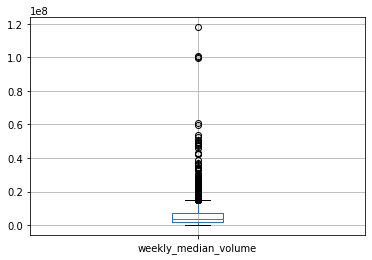

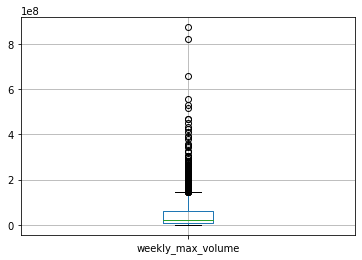

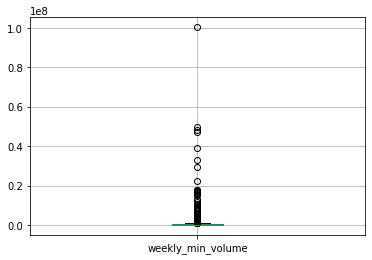

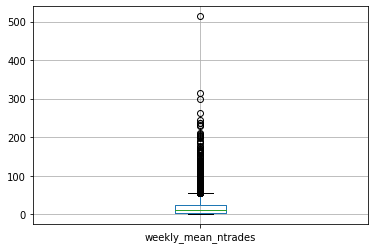

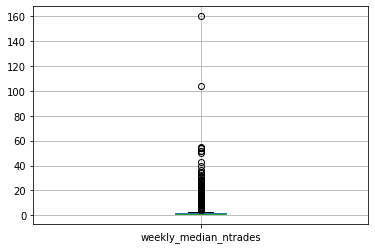

In [81]:
for col in col_continuous:
  plot = df.boxplot(column = col)
  plot.plot()
  plt.show()
  print()

In [90]:
print("My name is Tilak Shenoy")
print("My NetID is tshenoy2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Tilak Shenoy
My NetID is tshenoy2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
